### Introduction

Ok, we have now discussed a lot of the techniques to make our data in a more easy to use format.  Let's go through them.

As always, we start by calling our API.

In [75]:
import requests
response = requests.get("https://data.texas.gov/resource/naix-2893.json?location_address=3600%20MCKINNEY%20AVE%20STE%20100")
restaurant_receipts = response.json()

Notice that this time we'll provide slightly different data to our API.  There are two locations of Max's Wine Bar, so updated our search to just select a restaurant at a single address, the Dallas location.

So you can see now that we only have 25 receipts.

In [46]:
len(restaurant_receipts)

25

### Double checking our work

Start by confirming that we have only selected a single location.  Create a set to identify that there is only one location in our list.

In [49]:
location_addresses = set(list(map(lambda receipt: receipt['location_address'], restaurant_receipts)))
location_addresses

# {'3600 MCKINNEY AVE STE 100'}

{'3600 MCKINNEY AVE STE 100'}

Ok, now let's start by retrieving specific elements.

### Retreiving our elements

As a first step, let's map through the `obligation_end_date_yyyymmdd` and set it equal to the list `end_dates`.

In [50]:
end_dates = list(map(lambda receipt: receipt['obligation_end_date_yyyymmdd'], restaurant_receipts))

In [51]:
len(end_dates)

25

In [52]:
end_dates[0:3]

# ['2016-12-31T00:00:00.000',
#  '2017-08-31T00:00:00.000',
#  '2016-06-30T00:00:00.000']

['2016-12-31T00:00:00.000',
 '2017-08-31T00:00:00.000',
 '2016-06-30T00:00:00.000']

Ok, great now let's go create a list of our `total_receipts`. 

In [53]:
total_receipts = list(map(lambda receipt: receipt['total_receipts'], restaurant_receipts))

Now if we look at the total receipt data, we'll see that we have a list of strings.

In [55]:
total_receipts[0:3]
# ['56182', '9400', '50574']

['56182', '9400', '50574']

Change this data into a list of integers and assign it to the variable `total_receipts_ints`.

In [57]:
total_receipts_ints = list(map(lambda total: int(total), total_receipts))

In [59]:
total_receipts_ints[0:3]

# [56182, 9400, 50574]

[56182, 9400, 50574]

### Displaying our data

Now that we have a list of months, and another list of corresponding revenues, we can actually plot these values.  We can plot our data using the plotly library.

As a first step, we import our plotly library, and call the `init_notebook_mode` which allows us to use plotly without logging in.

In [60]:
import plotly
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

> Press shift enter

Now let's use our data from above to plot a graph.  Remember that we already have a list of months:

In [64]:
end_dates[0:3]

['2016-12-31T00:00:00.000',
 '2017-08-31T00:00:00.000',
 '2016-06-30T00:00:00.000']

And a list of corresponding revenues:

In [65]:
total_receipts_ints[0:3]

[56182, 9400, 50574]

So we can create a dictionary called `trace`, whatever that means. Then well provide our `end_dates` as the list of `x` values to display horizontally.  And our `total_receipts_ints` as our list of `y` values to display vertically.

In [73]:
trace = {'x': end_dates, 'y': total_receipts_ints, 'mode': 'markers'}

> Press shift enter

Now we can display this monthly data horizontally, and corresponding revenue data vertically by running the cell below.

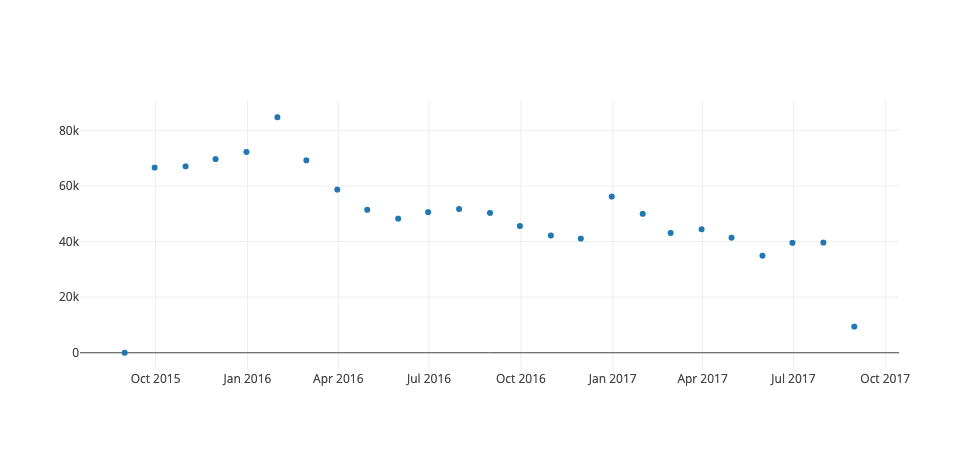

In [74]:
plotly.offline.iplot([trace])

> Uncomment the above line and press shift + enter

### Summary

Ok, so in this lesson we saw some of the fruit of our labors.  We started by calling our API, and this gave us back 25 dictionaries, with each dictionary containing a lot of extra data.  We selected just two attributes from these dictionaries -- months and total receipts.  Then we changed total receipts from a list of strings to a list of integers so that plotly could properly plot it as integers.

Along the way, we made use of both map, and our coercing strings into integers to clean our data.